In [1]:
## Install, as needed
#!pip3 install gensim==3.6.0
#!pip3 install sklearn
#!pip3 install tika
!pip3 install matplotlib==3.2.2

In [2]:
import tika
import numpy as np
tika.initVM()

In [3]:
from gensim.models import Word2Vec

In [4]:
from tika import parser
def convertPdf2TxtWithTika(in_pdf_file, out_text_file):
    # Load a file and extract information
    print ("INFO: - reading file = " + in_pdf_file)
    
    raw = parser.from_file(in_pdf_file)
    text = raw['content']
    
    ## Post-processing explained at: 
    # https://medium.com/@justinboylantoomey/fast-text-extraction-with-python-and-tika-41ac34b0fe61
    # Convert to string
    text = str(text)
    # Ensure text is utf-8 formatted
    safe_text = text.encode('utf-8', errors='ignore')
    # Escape any \ issues
    safe_text = str(safe_text).replace('\\', '\\\\').replace('"', '\\"')
    
    # Write out extracted content
    text_pdf = open(out_text_file, 'w')
    print ("INFO: - writing file = " + out_text_file)
    text_pdf.write(text)
    text_pdf.close()

In [5]:
pdf_file = "../data/Brendan_Reidy_Resume-2.pdf"
txt_file = "../data/resume.txt"

In [6]:
convertPdf2TxtWithTika(pdf_file, txt_file)

INFO: - reading file = ../data/Brendan_Reidy_Resume-2.pdf
INFO: - writing file = ../data/resume.txt


In [7]:
resume_txt = open(txt_file, "r")

resume_corpus = list(resume_txt.readlines())
resume_corpus = [x.replace("\n", "").split(" ") if not x=="\n" else [] for x in resume_corpus]
print(resume_corpus)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['Columbia,'], [], ['South', 'Carolina,', '29501', 'BRENDAN', 'REIDY'], [], ['(843)', '610-8275'], [], ['bcreidy@email.sc.edu'], [], ['github.com/BrendanCReidy'], [], ['EDUCATION'], [], ['University', 'of', 'South', 'Carolina', 'Columbia,', 'SC', 'January', '2022', '–', 'December', '2023'], [], ['(Expected)'], ['•', 'M.S.', 'in', 'Computer', 'Science,', 'GPA:', '4.00'], [], ['•', 'Area', 'of', 'Research:', 'Implementation', 'of', 'Natural', 'Language', 'Processing', 'Models', 'at', 'the', 'Edge'], [], ['•', 'Graduate', 'Coursework:', 'Compiler', 'Construction,', 'Neuromorphic', 'Computing,', 'Computer', 'Processing', 'of', 'Natural', 'Languages,'], [], ['Computer', 'Architecture'], [], ['University', 'of', 'South', 'Carolina', 'Aug', '2017', '–', 'December', '2022'], [], ['•', 'Bachelor', 'of', 'Science', 'in', 

In [8]:
# train model
model = Word2Vec(resume_corpus, min_count=1)
# summarize the loaded model
print("INFO: Model - \n" + str(model))

INFO: Model - 
Word2Vec(vocab=363, size=100, alpha=0.025)


In [9]:
words = list(model.wv.vocab)
print("INFO: Words found - \n" + str(words))

INFO: Words found - 
['Columbia,', 'South', 'Carolina,', '29501', 'BRENDAN', 'REIDY', '(843)', '610-8275', 'bcreidy@email.sc.edu', 'github.com/BrendanCReidy', 'EDUCATION', 'University', 'of', 'Carolina', 'SC', 'January', '2022', '–', 'December', '2023', '(Expected)', '•', 'M.S.', 'in', 'Computer', 'Science,', 'GPA:', '4.00', 'Area', 'Research:', 'Implementation', 'Natural', 'Language', 'Processing', 'Models', 'at', 'the', 'Edge', 'Graduate', 'Coursework:', 'Compiler', 'Construction,', 'Neuromorphic', 'Computing,', 'Languages,', 'Architecture', 'Aug', '2017', 'Bachelor', 'Science', 'EMPLOYMENT', 'Research', 'Assistant', 'Sep', '2019', 'Present', 'Facilitated', 'development', 'a', 'morphology', 'classification', 'dataset', 'and', 'implemented', 'various', 'neural', 'network', 'architec-', 'tures', 'TensorFlow', 'order', 'to', 'achieve', 'near', 'expert', 'accuracy', '(86%', 'vs', '89%)', 'on', 'Developed', 'deep', 'application', 'CUDA', 'C++', 'that', 'achieves', '10x', 'improvement', 'o

In [10]:
from sklearn.decomposition import PCA

In [11]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

<ipython-input-11-c5b7e458d7d3>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


In [33]:
allWords = []
for word in words:
    allWords.append(model[word])
    
word_arr = np.array(allWords)
word_arr = np.reshape(word_arr, (-1))
word_arr.shape
print("Statistics for word embeddings:", "\tmean", word_arr.mean(), "\tmedian", np.median(word_arr), "\tmin", word_arr.min(), "\tmax", word_arr.max())

Statistics for word embeddings: 	mean -6.0352636e-06 	median 1.0376073e-06 	min -0.0050356956 	max 0.005061689


<ipython-input-33-c89f0d20712f>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  allWords.append(model[word])


In [12]:
from matplotlib import pyplot

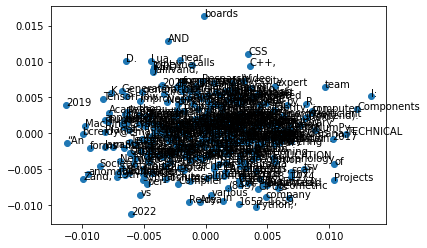

In [13]:
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

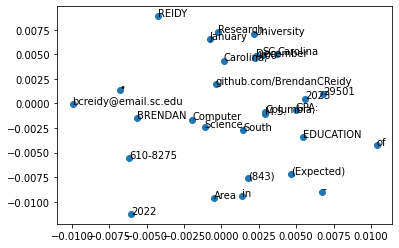

In [16]:
num_plot = 30
pyplot.scatter(result[:num_plot, 0], result[:num_plot, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words[:num_plot]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [39]:
projs_txt = open("../data/projs.txt", "r")

projs_corpus = list(projs_txt.readlines())
projs_corpus = [x.replace("\n", " ").split(" ") if not x=="\n" else [] for x in projs_corpus]
print(projs_corpus)

[['Water', '-', 'South', 'Carolina', ''], ['Evolving', 'Firearm', 'Regulations', ''], ['Crime', 'analysis', 'in', 'South', 'Carolina', ''], ['Target', 'aspect', 'based', 'sentiment', 'analysis', 'for', 'urban', 'neighborhoods', ''], ['Extracting', 'synthesis', 'procedure', 'from', 'solar', 'cell', 'perovskite', 'based', 'scientific', 'publications.', ''], ['Entity', 'Recognition', ':', 'Water', 'Data', 'Regulations', ''], ['TOS:', "Banks'", 'Terms', 'of', 'Services', 'summary', ''], ['Water', 'Regulation', 'Summarization', ''], ['Predicting', 'the', '2022', 'gubernatorial', 'election', 'of', 'South', 'Carolina', 'using', 'sentiment', 'analysis', 'of', 'Twitter.', ''], ['Scientific', 'Artical', 'Summarization', ''], ['New', 'FastText', '[with', 'Election', 'data]', ''], ['Chatbot', 'to', 'answer', 'quesries', 'regarding', 'WHO', 'Water', 'Regulations', '', ''], ['Verifying', 'various', 'foods', 'connection', 'to', 'improve', 'diabetes', 'using', 'NLP', 'techniques', '', ''], ['Summariza

In [40]:
model = Word2Vec(projs_corpus, min_count=1)
# summarize the loaded model
print("INFO: Model - \n" + str(model))

INFO: Model - 
Word2Vec(vocab=114, size=100, alpha=0.025)


In [41]:
words = list(model.wv.vocab)
print("INFO: Words found - \n" + str(words))

INFO: Words found - 
['Water', '-', 'South', 'Carolina', '', 'Evolving', 'Firearm', 'Regulations', 'Crime', 'analysis', 'in', 'Target', 'aspect', 'based', 'sentiment', 'for', 'urban', 'neighborhoods', 'Extracting', 'synthesis', 'procedure', 'from', 'solar', 'cell', 'perovskite', 'scientific', 'publications.', 'Entity', 'Recognition', ':', 'Data', 'TOS:', "Banks'", 'Terms', 'of', 'Services', 'summary', 'Regulation', 'Summarization', 'Predicting', 'the', '2022', 'gubernatorial', 'election', 'using', 'Twitter.', 'Scientific', 'Artical', 'New', 'FastText', '[with', 'Election', 'data]', 'Chatbot', 'to', 'answer', 'quesries', 'regarding', 'WHO', 'Verifying', 'various', 'foods', 'connection', 'improve', 'diabetes', 'NLP', 'techniques', 'and', 'conditions', 'Elections', 'FAQ', 'State', 'Mississippi', 'Image', 'Captioning', 'Transformer', 'Models', 'Specialist', 'Doctor', 'Recommendation', 'System', 'Application', 'Artificial', 'Neural', 'Networks', '(ANN)', 'Automatic', 'Speech', '(ASR)', 'on'

In [42]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

<ipython-input-42-c5b7e458d7d3>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


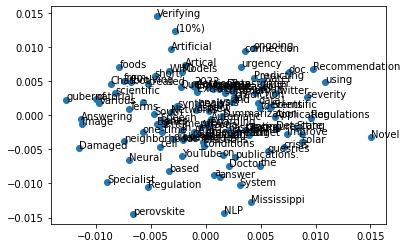

In [43]:
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()